In [115]:
import pandas as pd
import numpy as np

In [11]:
df = pd.read_csv('./data/kp-data-new.csv')

In [18]:
df

,datetime,Kp,Rounded value,status
0,2016-01-01 00:00:00+00:00,6.000,6,def
1,2016-01-01 03:00:00+00:00,5.333,5,def
2,2016-01-01 06:00:00+00:00,5.000,5,def
3,2016-01-01 09:00:00+00:00,3.333,3,def
4,2016-01-01 12:00:00+00:00,1.667,2,def
...,...,...,...,...
22683,2023-10-06 09:00:00+00:00,1.667,2,pre
22684,2023-10-06 12:00:00+00:00,1.000,1,pre
22685,2023-10-06 15:00:00+00:00,1.333,1,pre
22686,2023-10-06 18:00:00+00:00,1.000,1,pre


<AxesSubplot:xlabel='Rounded value'>

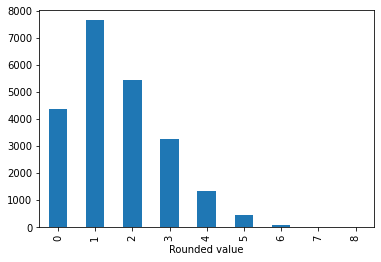

In [28]:
df['Rounded value'].value_counts().sort_index().plot.bar()

<AxesSubplot:xlabel='Kp'>

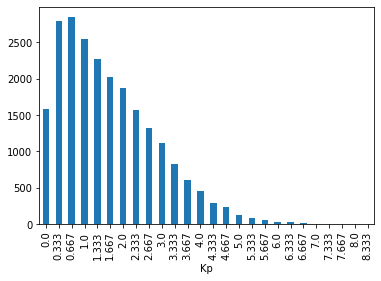

In [27]:
df.Kp.value_counts().sort_index().plot.bar()

In [43]:
lista = []
for i, data in df.loc[df['Rounded value'] == 4]['Rounded value'].items():
    lista.append([df['Rounded value'].iloc[i-1],df['Rounded value'].iloc[i+1]])



In [44]:
df['next_row'] = df['Rounded value'].shift(-1)

In [46]:
df['jump'] = df['next_row'] - df['Rounded value']

In [63]:
df['jump'].value_counts(normalize=True)

jump
 0.0    0.463658
-1.0    0.224490
 1.0    0.220523
 2.0    0.040993
-2.0    0.040552
 3.0    0.004849
-3.0    0.004099
-4.0    0.000309
 4.0    0.000264
 5.0    0.000220
-5.0    0.000044
Name: proportion, dtype: float64

In [64]:
len(df)

22688

In [61]:
df['Rounded value'].rolling(5).mean()

0        NaN
1        NaN
2        NaN
3        NaN
4        4.2
        ... 
22683    2.0
22684    1.8
22685    1.6
22686    1.4
22687    1.6
Name: Rounded value, Length: 22688, dtype: float64

In [65]:
df['Rounded value'].value_counts(normalize=True)

Rounded value
1    0.337579
2    0.240391
0    0.192833
3    0.144041
4    0.059767
5    0.019482
6    0.004760
7    0.000837
8    0.000309
Name: proportion, dtype: float64

In [68]:
df['Rounded value'].rolling(3).mean().value_counts(3)

Rounded value
1.000000    0.134576
0.666667    0.118090
1.333333    0.115313
1.666667    0.100547
0.333333    0.094067
2.000000    0.085780
2.333333    0.073658
0.000000    0.064665
2.666667    0.063034
3.000000    0.046769
3.333333    0.034250
3.666667    0.024332
4.000000    0.016530
4.333333    0.011681
4.666667    0.006744
5.000000    0.004320
5.333333    0.002380
5.666667    0.001278
6.000000    0.000926
6.333333    0.000353
7.000000    0.000264
6.666667    0.000264
7.333333    0.000176
Name: proportion, dtype: float64

In [78]:
df_16 = pd.read_csv("./data/data_2016.csv")

In [80]:
df_16.drop(columns=['Unnamed: 0'],inplace=True,axis=1)

In [82]:
df_16['interesting_flag'] = 

ValueError: Cannot set a DataFrame with multiple columns to the single column interesting_flag

In [144]:
df_16['more_data_flag_2'] = df_16.iloc[:,28:49].apply(lambda x: False if sum(x) == 0 else True,axis=1)

In [141]:
df_16.loc[df_16.more_data_flag == True].k_index_target.value_counts(normalize=True)

k_index_target
1    0.266805
2    0.223238
3    0.212141
0    0.142754
4    0.107634
5    0.038606
6    0.008821
Name: proportion, dtype: float64

In [142]:
df_16.iloc[:,1:4][df_16.more_data_flag].apply(lambda x: None if x.isna().sum() >0  else round(max(x)),axis=1).value_counts(normalize = True)

 3.0     0.199255
 4.0     0.172296
 2.0     0.151993
 1.0     0.113024
 5.0     0.105663
 0.0     0.062626
 6.0     0.057314
 7.0     0.034241
-1.0     0.030502
 8.0     0.020941
-2.0     0.011648
 9.0     0.009991
 10.0    0.006354
 11.0    0.004841
 12.0    0.004067
-3.0     0.003173
 13.0    0.002373
 16.0    0.001173
 14.0    0.001109
 15.0    0.001079
 17.0    0.001030
 22.0    0.000755
 23.0    0.000706
 19.0    0.000698
 18.0    0.000687
 20.0    0.000675
-4.0     0.000653
 21.0    0.000430
 24.0    0.000321
-5.0     0.000192
-6.0     0.000075
 27.0    0.000030
 33.0    0.000026
-7.0     0.000011
-8.0     0.000011
 26.0    0.000008
 25.0    0.000008
 31.0    0.000008
 28.0    0.000008
 35.0    0.000004
Name: proportion, dtype: float64

In [143]:
df_16.more_data_flag.value_counts(normalize=True)

more_data_flag
True     0.934278
False    0.065722
Name: proportion, dtype: float64

In [148]:
df_16.iloc[:,4:40][df_16.more_data_flag]

,4,5,6,7,8,9,10,11,12,13,...,30,31,32,33,34,35,36,37,38,39
327,0.000,0.000,0.000,131.397,0.000,0.000,0.000,0.000,0.000,0.0000,...,164.762,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
328,140.323,106.755,130.997,134.322,127.881,108.309,118.027,115.966,131.001,102.4500,...,158.480,161.013,155.285,158.071,162.295,159.692,169.169,151.225,165.092,168.270
329,144.051,110.328,126.048,129.171,132.422,117.537,112.194,108.848,133.660,70.1384,...,156.890,159.348,157.589,160.012,160.579,158.953,170.722,152.464,164.997,164.394
330,137.905,108.456,132.326,124.352,126.488,117.264,116.455,104.946,127.703,91.6063,...,161.496,161.096,153.394,158.500,165.432,160.099,166.090,153.777,165.789,158.237
331,139.688,112.211,131.186,125.734,126.398,116.180,117.663,107.718,126.388,104.2940,...,161.190,162.258,154.261,157.118,164.691,161.461,167.515,151.916,167.169,160.174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283675,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0000,...,707.105,614.609,535.073,491.992,464.946,428.218,422.534,370.468,435.828,433.054
283676,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0000,...,697.087,605.416,528.852,490.383,463.461,428.571,422.851,370.310,437.570,433.849
283677,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0000,...,670.690,603.712,540.753,491.865,461.852,422.244,423.028,371.797,436.951,433.287
283678,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0000,...,752.332,717.049,624.492,518.438,462.156,422.664,424.534,366.614,433.254,430.467


In [ ]:
df_16

In [151]:
df_16.iloc[:,1:4][df_16.more_data_flag]

,1,2,3
327,4.01820,-8.14256,-4.15323
328,3.93622,-8.28317,-3.96634
329,3.96667,-8.30292,-3.83562
330,3.64798,-8.59978,-3.49259
331,3.46245,-8.76184,-3.23501
...,...,...,...
283675,-5.92351,3.25329,-2.07272
283676,-6.10969,2.72681,-1.95783
283677,-5.78496,-2.02603,-2.64053
283678,-3.60551,-5.31124,-3.16447


<AxesSubplot:>

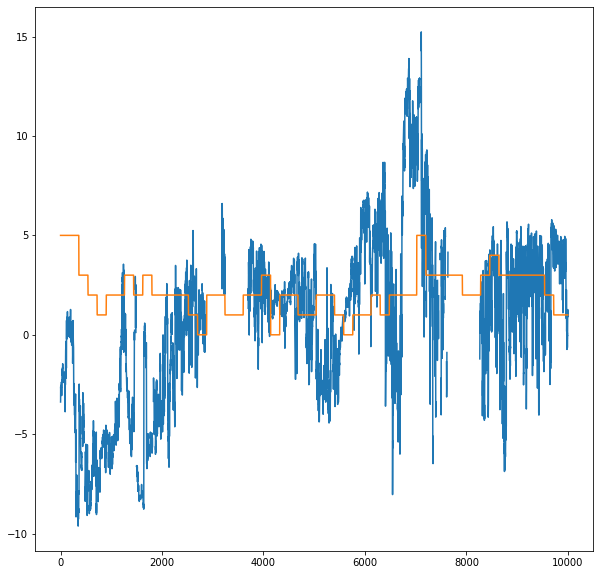

In [152]:
df_16.iloc[:10000,2].plot(figsize=(10,10))
df_16.iloc[:10000,56].plot(figsize=(10,10))

In [150]:
df_16.more_data_flag_2.value_counts(normalize=True)

more_data_flag_2
True     0.696817
False    0.303183
Name: proportion, dtype: float64